# Gaussowska paczka falowa w kwantantowym oscylatorze harmonicznym

In [11]:
import matplotlib
import matplotlib.pyplot as plt
# sp.init_printing()
import numpy as np
import sympy as sp
from scipy.integrate import quad
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.special import factorial
from scipy.special import hermite
import scipy.special as spec
import warnings
warnings.filterwarnings('ignore')

In [12]:
def psin(x, n):
    f = 1/(np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))) * np.exp(-x**2/2) * np.polyval(hermite(n), x)
    return f

In [80]:
szer = 0.8
x0 = 1

def f(x, x0 = x0, a = szer):
    return (1/np.sqrt(a * np.sqrt(np.pi))) * np.exp((-(x - x0) ** 2) / ( 2 * a ** 2))

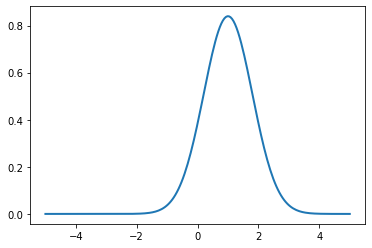

In [81]:
xs1 = np.linspace(-5, 5, 200)
plt.plot(xs1, f(xs1), lw = 2)

In [82]:
def psi(x, n):
    return psin(x, n)*f(x)

In [83]:
def C(n):
    val = quad(psi, -np.infty, np.infty, args = (n))
    return val[0]

In [84]:
# cn = np.linspace(0, 1, 100)
def PsiSum(x, t, cn):
    ys = np.zeros_like(x, dtype = np.complex128)
    for n in cn.values():
        ys += C(n+1) * psin(x, n) * np.exp(1j * (n + 1/2) * t)
    return ys

In [85]:
N = 5
n = np.linspace(0, N, N+1)
m = { i : i for i in n }

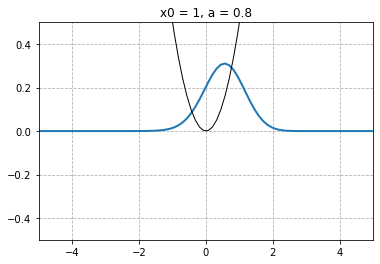

In [90]:
x00 = 5
xs = np.linspace(-x00, x00, 80)
fig2 = plt.figure()


ax = plt.axes(xlim = (-x00, x00), ylim = (-0.5, 0.5))
ax.set_title(f'x0 = {x0}, a = {szer}')

ax.grid(ls = '--')
t =0.1

line2, = ax.plot(xs, np.abs(PsiSum(xs, t, m))**2, lw = 2)
line3, = ax.plot(xs, 1/2*xs**2, lw = 1, c = 'k')

In [91]:
xs = np.linspace(-3, 3, 100)
fig = plt.figure()
ax = plt.axes(xlim = (-3, 3), ylim = (-0.1, 0.5))
ax.grid(ls = '--')
ax.set_title(f'x0 = {x0}, a = {szer}')
line1, = ax.plot([], [], lw = 2)
line2, = ax.plot([], [], lw = 2)
line3, = ax.plot([], [], lw = 2)
line4, = ax.plot(xs, 1/2*xs**2, lw = 1, c = 'k')
dt = 0.03
plt.close()

def animate(i):
    line1.set_data(xs, np.abs(PsiSum(xs, dt * i, m))**2)
#     line2.set_data(xs, np.imag(PsiSum(xs, dt * i, m)))
#     line3.set_data(xs, np.real(PsiSum(xs, dt * i, m)))
    return line1, #line2, line3

anim = animation.FuncAnimation(fig, animate, frames=600, interval=10, blit=True)
HTML(anim.to_html5_video())